# 1.Make data


In [2]:
import cv2
import os
import uuid

# Input and Directory Setup
def count_folders(mom_folder_path):
    # List all directories in the specified path
    folders = [name for name in os.listdir(mom_folder_path) 
               if os.path.isdir(os.path.join(mom_folder_path, name))]
    # Return the count of directories
    return len(folders)

mom_folder_path = "E:/machine_learning/New folder/data"
num_labels = count_folders(mom_folder_path)
id=str(num_labels)
id_path = os.path.join('data', id)
os.makedirs(id_path, exist_ok=True)
# Video Capture
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Crop the frame
    frame = frame[120:120 + 250, 250:250 + 250, :]
    
    
    # Capture and Save Images
    if cv2.waitKey(1) == ord('c'):
        for i in range(200):
            imgname = os.path.join(id_path, '{}.jpg'.format(uuid.uuid1()))
            cv2.imwrite(imgname, frame)
    # Display the frame        
    cv2.imshow('Image Collection', frame)
    # Break loop on 'q' key press
    if cv2.waitKey(1) == ord('q'):
        break
# Release and Destroy
cap.release()
cv2.destroyAllWindows()


# 2.Build model and data preprocessing

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#count labels folder
def count_folders(mom_folder_path):
    # List all directories in the specified path
    folders = [name for name in os.listdir(mom_folder_path) 
               if os.path.isdir(os.path.join(mom_folder_path, name))]
    # Return the count of directories
    return len(folders)

mom_folder_path = "E:/machine_learning/New folder/data"
num_labels = count_folders(mom_folder_path)
# Model definition

model1 = Sequential([
    Conv2D(64, (10, 10), padding="same", activation='relu', input_shape=(105, 105, 3)),  # Correct input shape
    MaxPooling2D((2, 2)),
    Dropout(0.05),
    Conv2D(128, (7, 7), padding="same", activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (4, 4), padding="same", activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(256, (4, 4), padding="same", activation='relu'),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(num_labels, activation='softmax'),  # Assuming 3 classes
])

# Load and preprocess the data
data_path = 'E:/machine_learning/New folder/data'

# Initialize ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)  # 80% training, 20% validation

# Load training data
train_data = datagen.flow_from_directory(
    data_path,
    target_size=(105, 105),
    batch_size=16,
    class_mode='categorical',  # Produces one-hot encoded labels
    subset='training',
    shuffle=True
)

# Load validation data
val_data = datagen.flow_from_directory(
    data_path,
    target_size=(105, 105),
    batch_size=16,
    class_mode='categorical',  # Produces one-hot encoded labels
    subset='validation',
    shuffle=True
)

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Start training
print("Start training")
H = model1.fit(train_data, validation_data=val_data, epochs=6)
model1.save('faceid_model.h5')

Found 328 images belonging to 3 classes.
Found 81 images belonging to 3 classes.
Start training
Epoch 1/6
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4640 - loss: 2.0607 - val_accuracy: 0.9877 - val_loss: 0.6137
Epoch 2/6
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7557 - loss: 0.6933 - val_accuracy: 0.9877 - val_loss: 0.0963
Epoch 3/6
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9836 - loss: 0.0585 - val_accuracy: 0.9877 - val_loss: 0.1937
Epoch 4/6
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9791 - loss: 0.1513 - val_accuracy: 0.9877 - val_loss: 0.0801
Epoch 5/6
21/21 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.9643 - loss: 0.1266 - val_accuracy: 0.9877 - val_loss: 0.0327
Epoch 6/6
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.9962 - loss: 0.0261 - val_accuracy: 1.0000 - val_loss: 0.0044


# 3.Test model

3.1. Test with test set

In [8]:
from matplotlib import pyplot as plt
images, labels = next(train_data)
plt.imshow(images[20])
model1.predict(images[20:21])

IndexError: index 20 is out of bounds for axis 0 with size 16

3.2 Update testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


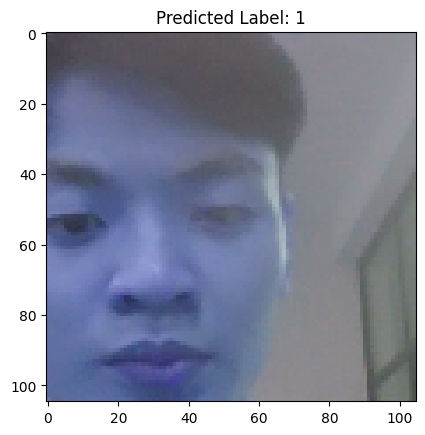

Predictions: [[0.00111925 0.94076765 0.05811313]
 [0.00285249 0.9786688  0.01847872]]


In [11]:
import cv2
import os
import uuid
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

# Initialize the list to hold the images
captured_images = []

# Video capture setup
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Crop the frame
    frame = frame[120:120 + 250, 250:250 + 250, :]
    
    # Display the frame
    cv2.imshow('Image Collection', frame)
    
    # Capture and append image to the list when 'a' is pressed
    if cv2.waitKey(1) == ord('a'):
        
        # Resize the frame to the model's input size (105, 105)
        resized_frame = cv2.resize(frame, (105, 105))
        # Normalize the image (convert it to float and scale)
        normalized_frame = resized_frame / 255.0
        # Append the normalized image to the list
        captured_images.append(normalized_frame)
    
    # Exit loop when 'q' is pressed
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Convert the list of images to a NumPy array
captured_images_array = np.array(captured_images)
# Load the model
model2 = tf.keras.models.load_model("faceid_model.h5")
# #
# # Predict the labels for the captured images
predictions = model2.predict(captured_images_array)

# # Display the first captured image and its predicted label
plt.imshow(captured_images_array[0])
plt.title(f"Predicted Label: {np.argmax(predictions[0])}")
plt.show()

# Print all predictions
print("Predictions:", predictions)
